# scikit-learn イントロダクション 

大北 剛

このセッションでは、Pythonで記述された機械学習用のツールのコレクションを含むScikit-Learnの基本について説明します。詳細については、http：//scikit-learn.orgをご覧ください。

## Scikit-Learnについて

Scikit-Learnは、NumPy（Numerical Python)（http://numpy.org）および SciPy（Scientific Python）（http://scipy.org）ライブラリに基づいて構築されており、効率的なコア内数値計算とPython内の科学計算に適しています。このため、scikit-learnは特に大きなデータセット用に設計された訳ではありません.

まず, 最初にmatplotlibライブラリをinlineで実行するというmagic codeを書いておきます. 次に
matplotlib.pyplotというライブラリ(matplotlib/pyplotというディレクトリにあるAPI)をpltという名前にaliasしています. aliasとはpltという名前が使われるたびに, matplotlib.pyplotと置き換えてよばれるということです.    

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn')

sklearnはplot_XXXという形でたくさんの簡単な例を実行することができます. 次にmatplotlibライブラリを使った例として, plot_classifier_comparisonというAPIを実行してみましょう. これはすでに内部で20点の正例と負例を生成して, これを分類して, 図示するというコードが入っています。そこで, とりあえず実行します. 実行ボタン(jupyterの場合は, 上方のメニューの"Run"と書かれたすぐ下のプレイの絵をクリックします). もしくは, メニューのCellのRun Cellsを実行します. すると, 絵が出力されます(もしくは, デフォルトですでに絵があれば, それが上書きされます).

また、jupyter右上にPython3で白丸があります. ここが黒丸になると, 実行中を示します。ここが白丸になると実行がユーザーに返ってきていることを示します。

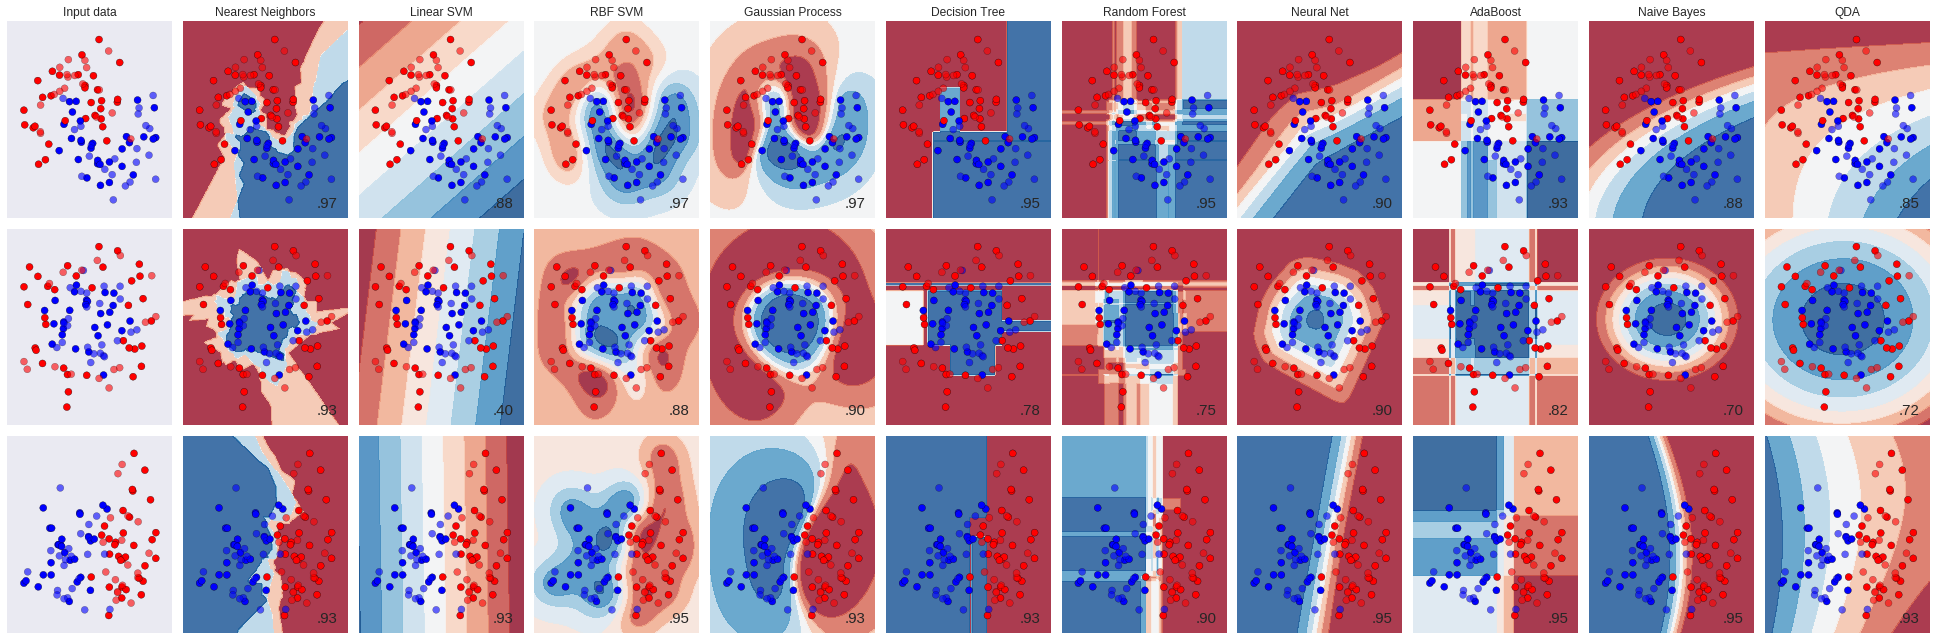

In [20]:
from plot_classifier_comparison2  import  plot_classifier_comparison

plot_classifier_comparison()

## Scikit-learnでのデータの表現

機械学習は、データからモデルを作成します. コンピューターで理解するためにデータをどのように表現できるかを説明します。同時にmatplotlibを用いて、データを視覚化する方法をいくつか示します。

scikit-learnに実装されているほとんどの機械学習アルゴリズムは、データが2次元行列に格納されます。行列は、numpy配列かscipy.sparse行列のいずれかです。行列のサイズは[n_samples、n_features]です。

    n_samples：サンプル数：各サンプルは処理するアイテムです. サンプルは、ドキュメント、画像、サウンド、ビデオ、天体、データベースまたはCSVファイルの行です.
    n_features：各アイテムを定量的に説明するために使用できる特徴または明確な特性の数です。特徴は一般に実数値ですが、ブール値や離散値の場合もあります。

特徴の数は事前に固定する必要があります。ただし、非常に高次元（たとえば、数百万の特徴）になる可能性がありますが、もしほとんどの値がゼロであればスパースな行列scipy.sparse行列を用いるのがメモリ的に有効な場合があります。


![Data Layout](images/data-layout.png)

(Figure from the [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook))

## アイリスデータの例

scikit-learnはいくつかのデータを自身でもっており, 簡単にロードすることができます。その一つがirisデータです. irisとはあやめです。このデータは特徴を4つもち, 3種類のラベルをもっています。

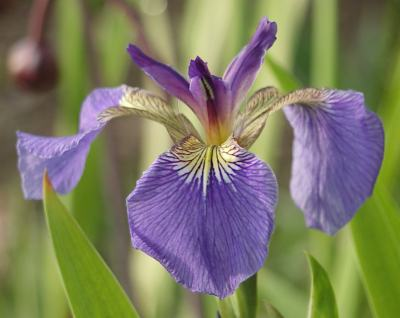

Iris Setosa



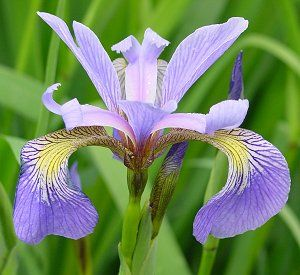

Iris Versicolor



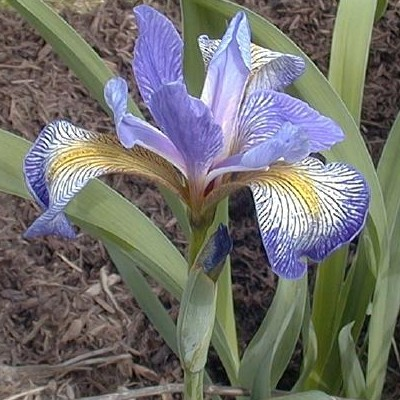

Iris Virginica


In [2]:
from IPython.core.display import Image, display
display(Image(filename='images/iris_setosa.jpg'))
print("Iris Setosa\n")

display(Image(filename='images/iris_versicolor.jpg'))
print("Iris Versicolor\n")

display(Image(filename='images/iris_virginica.jpg'))
print("Iris Virginica")

In [ ]:
まずこのirisのデータをロードするのは, sklearnの場合には, load_irisという特別のAPIが備わっています。そこで, これを用いてロードすることにします。このようなデータのロードはさまざまなPythonライブラリにデモ用に備わっていることが多いですが, それぞれのスタイルでロードするので注意が必要です. また、データは画像や自然言語などの生のデータであることも多いですが, すでにcsvなどの形に整形されていることもあります. csvであれば, カンマ区切などのパラメータをしてやって, pandasライブラリを用いてロードすることが多いです. これはまたpandasライブラリの使い方の部分で学習してください.

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
iris.keys()

In [ ]:
n_samples, n_features = iris.data.shape
print((n_samples, n_features))
print(iris.data[0])

In [ ]:
print(iris.data.shape)
print(iris.target.shape)

In [ ]:
print(iris.target)

In [ ]:
print(iris.target_names)

このデータは4次元ですが、単純なscatter plotと呼ばれる散布図を用いると, 2次元で視覚化できます.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index]);

## 線形回帰LinearRegressionの例

まず, 簡単な線形回帰の例を見ましょう. これにはLinearRegressionというモデルを示すAPIを準備します. これはsklearn/linear_modelというディレクトリに用意されているので, sklearn.linear_modelという所から, LinearRegressionとしてimportします. このようにimportすることで, コードの中でLinearRegressionというAPIが使えるようになります. 別のimportのやり方として, import sklearn.linear_modelとしてから, sklearn.linear_model.LinearRegressionという形で呼び出すこともできます.

In [13]:
from sklearn.linear_model import LinearRegression

import sklearn.linear_model

In [14]:
sklearn.linear_model.LinearRegression()

LinearRegression()

LinearRegression()

まず, LinearRegressionをnormalize=Trueというパラメータだけを設定して, constructします. このように初期化した回帰器をmodelに入れます. 今後, このmodelのメソッドを用いることで, 学習のトレーニングとテストを行うことになります. ここではnormalize=Trueというパラメータだけでしたが, ここにはさまざまなパラメータが設定できます. これには, sklearnのドキュメントを見てください. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linearregression#sklearn.linear_model.LinearRegression sklearnの詳細な説明は, ウェブ上にありますので参照してください. なお, 左上にscikit-learn 0.23.1とあれば, 0.23.1というバージョンの説明なので, 別のバージョンを使っている場合には, 同じバージョンのを探してください.

In [15]:
model = LinearRegression(normalize=True)

print(model.normalize)

print(model)

True
LinearRegression(normalize=True)


別の方法は, helpでAPIを引数にすると, 出て来る場合があります. pathが合っていることを確かめてください. ライブラリの中身を呼びにいっているからです.

In [16]:
import sklearn.linear_model

help(sklearn.linear_model.LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean 

機械学習の説明に入る前に, matplotlibライブラリの最も基本なAPIを見ておきます. x軸とy軸を設定して, 点をプロットします. まず, (numpyをnpにエイリアス/別名定義されていることを前提として), np.arange(10)により, xを0から10までの領域に設定します. このAPIが何かわからなければ, メニューでInsert->Insert Cell Aboveなどでセルを作って, その中で確かめます. ここでは次の行にprint(x)としてしまっています. yも同様です. 実行すればわかるように, arange(10)では0から9までの10個の要素が1間隔で作成されています. Pythonは配列でも何でもインデックスは(指定しなければ)0から始まることに注意してください. そして, yには, とくにxがベクトルで10個の要素という指定はありませんが、デフォルトでxのデータの型にしたがって10個のベクトルのそれぞれに従って値を出します. したがってyもベクトルとなります. 次にこれをプロットするには, matplotlib.pylabのplotというメソッドを用います. jupyterでは, まずmatplotlib inlineという形のインラインを%をつけて実行しておきます. これにより, インラインで実行することを示します. なお, pythonから直接Pythonコードを実行する際には, plot.show()が必要となるので注意してください (jupyterのみを使う場合はよいです). 


[0 1 2 3 4 5 6 7 8 9]
[ 1  3  5  7  9 11 13 15 17 19]


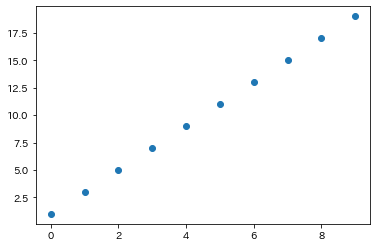

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
x = np.arange(10)
y = 2 * x + 1
print(x)
print(y)
plt.plot(x, y, 'o');

入力Xはサンプルx特徴数という行列となります. このため, xの行列の形を縦長の形にするために下のようにします.

In [19]:
X = x[:, np.newaxis]
print(X)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[ 1  3  5  7  9 11 13 15 17 19]


トレーニングデータのペアXとyを引数にしてmodel.fitを呼びます. sklearnでfitというメソッドはトレーニングするという一般的なAPIで, データを与えると大概はこのAPIを呼び出すことになります. 一方, テストをする一般的なAPIは, predictを用います. なお, fit()した後に値が確定する変数はコンストラクタでは束縛せず、fit()の中で変数名にサフィックスとして_を付けて宣言します。たとえば, coef_やfeature_importances_です. 

In [20]:
# fit the model on our data
model.fit(X, y)

# underscore at the end indicates a fit parameter
print(model.coef_)
print(model.intercept_)

[2.]
0.9999999999999982


機械学習の2つ目に重要なAPIはpredictです. これにより, テストを行ないます. トレーニングしたモデルのパラメータはmodel内に保持されるため, これに対してpredictメソッドをmodel.predictという形で実行します. 今, テストしたい点は1点だとします. このpredictメソッドは上の入力Xと同様にサンプルx特徴数という行列となります. このため下のようにします. 実行すると[7.4]という値が出力されますが, これは, 上記でトレーニングした線形回帰直線にx=3.2という点をフィットさせると7.4という値になったということになります.


In [27]:
X_test=[[3.2]]
y_pred=model.predict(X_test)
print (y_pred)

[7.4]


通常、このような結果を図示するために, さらにmatplotlibライブラリを用いて処理します. また、性能を評価する際には, precisionやrecallを求めることになります。